# Introduction
This script calculates and visualizes the substructure of the respective RNA sequence.
The procedure is divided into four steps (in step 0 three example sequences are imported).

The first step calculates the so-called pairing matrix on the basis of the RNA sequence, which contains all possible 
base pairings of the respective sequence as output.

In the second step, based on the respective sequence and the pairing matrix calculated in the previous step #1, 
the minimum free energy structure is calculated using the Zuker algorithm and later integrated 
into the prediction of the RNA structure.

In the third step, structural elements (helices and loops) of the RNA sequence are calculated on 
the basis of the pairing matrix (step #1) and the predicted secondary structure (step #2).

Subsequently, in the fourth step, the respective 2d structure is calculated and visualized on the basis of the sequence, 
the pairing matrix (step #1), 
the secondary structure, the minimum energy level (step #2) and structure elements (step #3).


In [10]:
# General imports
import numpy as np
import matplotlib.pyplot as plt

In [1]:
# 0.  Different RNA Sequences
seq_hiv = "GGGUCUCUCUGGUUAGACCAGAUCUGAGCCUGGGAGCUCUCUGGCUAACUAGGGAACCCAC"

seq_MT_RNR2 = f"""
GCUAAACCUAGCCCCAAACCCACUCCACCUUACUACCAGACAACCUUAGCCAAACCAUUUACCCAAAUAAAGUAUAGGCGAUAGAAAUUGAAACCUGGCGCAAUAGAUAUAGUACCGCAAGGGAAAGAUGAAAAAUUAUAACCAAGCAUAAUAUAG
CAAGGACUAACCCCUAUACCUUCUGCAUAAUGAAUUAACUAGAAAUAACUUUGCAAGGAGAGCCAAAGCUAAGACCCCCGAAACCAGACGAGCUACCUAAGAACAGCUAAAAGAGCACACCCGUCUAUGUAGCAAAAUAGUGGGAAGAUUUAUAG
GUAGAGGCGACAAACCUACCGAGCCUGGUGAUAGCUGGUUGUCCAAGAUAGAAUCUUAGUUCAACUUUAAAUUUGCCCACAGAACCCUCUAAAUCCCCUUGUAAAUUUAACUGUUAGUCCAAAGAGGAACAGCUCUUUGGACACUAGGAAAAAA
CCUUGUAGAGAGAGUAAAAAAUUUAACACCCAUAGUAGGCCUAAAAGCAGCCACCAAUUAAGAAAGCGUUCAAGCUCAACACCCACUACCUAAAAAAUCCCAAACAUAUAACUGAACUCCUCACACCCAAUUGGACCAAUCUAUCACCCUAUAGAAG
AACUAAUGUUAGUAUAAGUAACAUGAAAACAUUCUCCUCCGCAUAAGCCUGCGUCAGAUUAAAACACUGAACUGACAAUUAACAGCCCAAUAUCUACAAUCAACCAACAAGUCAUUAUUACCCUCACUGUCAACCCAACACAGGCAUGCUCAUAAG
GAAAGGUUAAAAAAAGUAAAAGGAACUCGGCAAAUCUUACCCCGCCUGUUUACCAAAAACAUCACCUCUAGCAUCACCAGUAUUAGAGGCACCGCCUGCCCAGUGACACAUGUUUAACGGCCGCGGUACCCUAACCGUGCAAAGGUAGCAUAAUCA
CUUGUUCCUUAAAUAGGGACCUGUAUGAAUGGCUCCACGAGGGUUCAGCUGUCUCUUACUUUUAACCAGUGAAAUUGACCUGCCCGUGAAGAGGCGGGCAUAACACAGCAAGACGAGAAGACCCUAUGGAGCUUUAAUUUAUUAAUGCAAACAG
UACCUAACAAACCCACAGGUCCUAAACUACCAAACCUGCAUUAAAAAUUUCGGUUGGGGCGACCUCGGAGCAGAACCCAACCUCCGAGCAGUACAUGCUAAGACUUCACCAGUCAAAGCGAACUACUAUACUCAAUUGAUCCAAUAACUUGACCAAC
GGAACAAGUUACCCUAGGGAUAACAGCGCAAUCCUAUUCUAGAGUCCAUAUCAACAAUAGGGUUUACGACCUCGAUGUUGGAUCAGGACAUCCCGAUGGUGCAGCCGCUAUUAAAGGUUCGUUUGUUCAACGAUUAAAGUCCUACGUGAUCUGA
GUUCAGACCGGAGUAAUCCAGGUCGGUUUCUAUCUACNUUCAAAUUCCUCCCUGUACGAAAGGACAAGAGAAAUAAGGCCUACUUCACAAAGCGCCUUCCCCCGUAAAUGAUAUCAUCUCAACUUAGUAUUAUACCCACACCCACCCAAGAACAGG
GUUU
"""

seq_MT_RNR1 = f"""
AAUAGGUUUGGUCCUAGCCUUUCUAUUAGCUCUUAGUAAGAUUACACAUGCAAGCAUCCCCGUUCCAGUGAGUUCACCCUCUAAAUCACCACGAUCAAAAGGAACAAGCAUCAAGCACGCAGCAAUGCAGCUCAAAACGCUUAGCCUAGCCACACCCC
CACGGGAAACAGCAGUGAUUAACCUUUAGCAAUAAACGAAAGUUUAACUAAGCUAUACUAACCCCAGGGUUGGUCAAUUUCGUGCCAGCCACCGCGGUCACACGAUUAACCCAAGUCAAUAGAAGCCGGCGUAAAGAGUGUUUUAGAUCACCCCCUC
CCCAAUAAAGCUAAAACUCACCUGAGUUGUAAAAAACUCCAGUUGACACAAAAUAGACUACGAAAGUGGCUUUAACAUAUCUGAACACACAAUAGCUAAGACCCAAACUGGGAUUAGAUACCCCACUAUGCUUAGCCCUAAACCUCAACAGUUAAAUC
AACAAAACUGCUCGCCAGAACACUACGAGCCACAGCUUAAAACUCAAAGGACCUGGCGGUGCUUCAUAUCCCUCUAGAGGAGCCUGUUCUGUAAUCGAUAAACCCCGAUCAACCUCACCACCUCUUGCUCAGCCUAUAUACCGCCAUCUUCAGCAAACC
CUGAUGAAGGCUACAAAGUAAGCGCAAGUACCCACGUAAAGACGUUAGGUCAAGGUGUAGCCCAUGAGGUGGCAAGAAAUGGGCUACAUUUUCUACCCCAGAAAACUACGAUAGCCCUUAUGAAACUUAAGGGUCGAAGGUGGAUUUAGCAGUAAA
CUAAGAGUAGAGUGCUUAGUUGAACAGGGCCCUGAAGCGCGUACACACCGCCCGUCACCCUCCUCAAGUAUACUUCAAAGGACAUUUAACUAAAACCCCUACGCAUUUAUAUAGAGGAGACAAGUCGUAACAUGGUAAGUGUACUGGAAAGUGCACU
UGGACGAAC
"""

In [5]:
# 1. Base Pairing Detection
def create_pairing_matrix(sequence):
    """
    Create a base pairing matrix for a given RNA sequence.

    This function generates a matrix represening all possible base pairings
    in the given RNA sequence, including Watson-Crick pairs (A-U, G-C) and 
    woble pairs (G-U).

    Args:
    sequence (str): The RNA sequence to analyze.

    Returns:
    np.ndarray: A 2D numpy array where 1 indicates a possible base pair and 0 indicates no pairing.

    Note:
    - The matrix is upper triangular to avoid redundancy.
    - G-U wobble pairs are included as they are common in RNA structures.
    """
    
    n = len(sequence)
    seq_array = np.array(list(sequence))
    
    # Create boolean masks for each base type
    a_mask = seq_array == 'A'
    u_mask = seq_array == 'U'
    g_mask = seq_array == 'G'
    c_mask = seq_array == 'C'
    
    # Create the pairing matrx using broadcasting
    matrix = np.zeros((n, n), dtype=np.int8)
    
    # A-U pairing
    matrix |= np.outer(a_mask, u_mask)
    matrix |= np.outer(u_mask, a_mask)
    
    # G-C pairing
    matrix |= np.outer(g_mask, c_mask)
    matrix |= np.outer(c_mask, g_mask)
    
    # G-U wobble pairing
    matrix |= np.outer(g_mask, u_mask)
    matrix |= np.outer(u_mask, g_mask)
    
    # Ensure the matrix is upper triangular
    matrix = np.triu(matrix, k=1)
    
    return matrix

# Test
seq = seq_hiv
pairing_matrix = create_pairing_matrix(seq)
pairing_matrix

array([[0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [7]:
# 2. Implement Minimum Energy Model
# Basic version of the Zuker algorithm
# Source: https://library.fiveable.me/key-terms/bioinformatics/zuker-algorithm
def zuker_algorithm_(sequence, pairing_matrix):
    """
    Implement an optimized version of the Zuker algorithm for RNA secondary structure prediction.

    This function calculates the minimum free energy structure of the RNA sequence
    using a dynamic programming approach. 
    
    Args:
    sequence (str): The RNA sequence to analye.
    pairing_matrix (np.ndarray): Te base pairing matrix from create_pairing_matrix().

    Returns:
    float: The minimum free energy of the predicted structure.

    Note:
    - This is still a simplified version and uses a basic energy model.
    - Limitation: For more accurate predictions, more sophisticated energy parameters should be used.
    """
    n = len(sequence)
    energy_matrix = np.full((n, n), np.inf)
    
    # Initialize diagonal (unpaired bases have zero energy)
    np.fill_diagonal(energy_matrix, 0)
    
    # Pre-compute indices for vectorized operations
    i_indices, j_indices = np.triu_indices(n, k=1)
    
    # Fill the matrix
    for length in range(1, n):
        # Select indices for the current diagonal
        mask = j_indices - i_indices == length
        i = i_indices[mask]
        j = j_indices[mask]
        
        # Case 1: i and j pair
        pair_mask = pairing_matrix[i, j] == 1
        energy_matrix[i[pair_mask], j[pair_mask]] = energy_matrix[i[pair_mask]+1, j[pair_mask]-1] - 1
        
        # Case 2: i and j don't pair
        energy_matrix[i, j] = np.minimum.reduce([
            energy_matrix[i, j],
            energy_matrix[i+1, j],
            energy_matrix[i, j-1]
        ])
    
    # The minimum free energy is stored in the top-right corner of the matrix
    return energy_matrix[0, -1]


# Usage
min_energy = zuker_algorithm(seq, pairing_matrix)
print(f"Minimum free energy: {min_energy}")

Minimum free energy: -26.0


In [8]:
# 3. Identify Structural Elements
def identify_structural_elements_optimized(pairing_matrix):
    """
    Identify basic strutural elements (helices and loops) in the RNA structure.

    This function analyzes the pairing matrix to find helices
    and loops.

    Args:
    pairing_matrix (np.ndarray): The base pairing matrix from create_pairing_matrix().

    Returns:
    tuple: Two arays containing:
        - helices: Array of tuples (start, end, length) for each helix.
        - loops: Array of tuples (start, end, size) for each loop.

    Note:
    - Helices are defined as regions with at least 3 consecutive base pairs.
    - Source: https://www.nature.com/articles/s41467-020-19699-5
    """
    n = pairing_matrix.shape[0]
    
    # Find all base pairs
    i, j = np.where(pairing_matrix == 1)
    
    # Identify helices
    helix_lengths = np.zeros_like(i)
    for idx in range(len(i)):
        helix_mask = np.arange(min(n - i[idx], j[idx] + 1))
        helix = pairing_matrix[i[idx] + helix_mask, j[idx] - helix_mask]
        helix_lengths[idx] = np.sum(helix)
    
    # Filter helices with length >= 3
    valid_helices = helix_lengths >= 3
    helices = np.column_stack((i[valid_helices], j[valid_helices], helix_lengths[valid_helices]))
    
    # Identify lops
    loop_sizes = j - i - 1
    valid_loops = loop_sizes > 0
    loops = np.column_stack((i[valid_loops], j[valid_loops], loop_sizes[valid_loops]))
    
    return helices, loops

# Usage example
pairing_matrix = create_pairing_matrix(seq)  
helices, loops = identify_structural_elements_optimized(pairing_matrix)
print("Helices:", helices)
print("Loops:", loops)

# Potential Improvement and Limitation: Extend the functionality to classify different types of loops and identify more complex structures like pseudoknots.

Helices: [[ 0  5  3]
 [ 0  6  3]
 [ 0  7  3]
 ...
 [45 55  3]
 [49 59  3]
 [51 58  3]]
Loops: [[ 0  3  2]
 [ 0  4  3]
 [ 0  5  4]
 ...
 [53 57  3]
 [53 58  4]
 [53 60  6]]


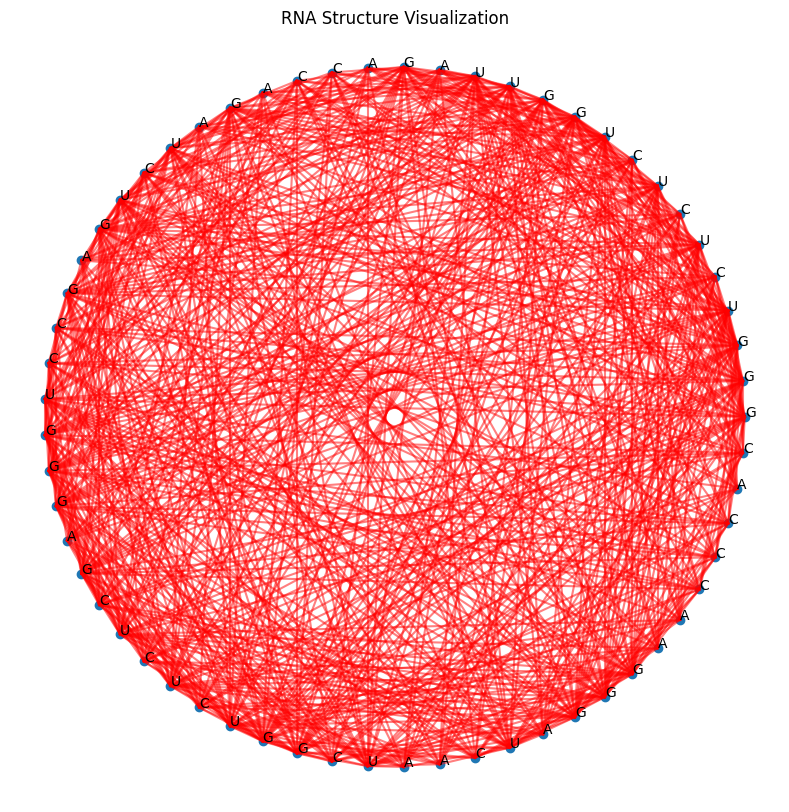

In [12]:
# 4. Visualize the Structure
# This part creates a circular plot of the RNA sequence with base pairings shown as lines.

def visualize_rna_structure(sequence, pairing_matrix):
    """
    Visualize the RNA secondary structure as a circle plot.

    This function creates a 2D visualization of the RNA structure, where bases
    are arranged in a circle and base pairings are shown as lines across the circle.

    Args:
    sequence (str): The RNA sequence.
    pairing_matrix (np.ndarray): The base pairing matrix from create_pairing_matrix().

    Returns:
    None: Displays the plot using matplotlib.

    Note:
    - Bases are represented as points on a circle.
    - Base pairings are shown as red lines connecting the paired bases.
    - This visualization is useful for getting a quick overview of the structure,
      but may become cluttered for longer sequences.
    """
    fig, ax = plt.subplots(figsize=(10, 10))
    n = len(sequence)
    
    # Plot the sequence as a cicle
    theta = np.linspace(0, 2*np.pi, n, endpoint=False)
    x = np.cos(theta)
    y = np.sin(theta)
    ax.scatter(x, y)
    
    # Add base labels
    for i, base in enumerate(sequence):
        ax.annotate(base, (x[i], y[i]))
    
    # Draw base pairings
    i, j = np.where(pairing_matrix == 1)
    mask = i < j  # Ensure we only plot each pair once
    ax.plot([x[i[mask]], x[j[mask]]], [y[i[mask]], y[j[mask]]], 'r-', alpha=0.5)
    
    ax.set_aspect('equal')
    ax.axis('off')
    plt.title("RNA Structure Visualization")
    plt.show()

# Usage
visualize_rna_structure(seq, pairing_matrix)

In [8]:
"""
Next Steps / TBD
Refine energy calculations using more accurate parameters.
Implement methods for predicting tertiary interactions.
Add comparative sequence analysis if multiple related sequences are available.
Idea: Consider incorporating machine learning models for improved accuracy.
Idea Implement validation against known structures or experimental data.
"""

'\nNext Steps / TBD\nRefine energy calculations using more accurate parameters.\nImplement methods for predicting tertiary interactions.\nAdd comparative sequence analysis if multiple related sequences are available.\nConsider incorporating machine learning models for improved accuracy.\nImplement validation against known structures or experimental data.\n'